Color Recognition Program
Sherwin Williams 
Using Pandas, matplotlib

Link to DATABASE: https://www.sherwin-williams.com/home-builders/color/tools/downloadable-color-palettes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import numpy as np


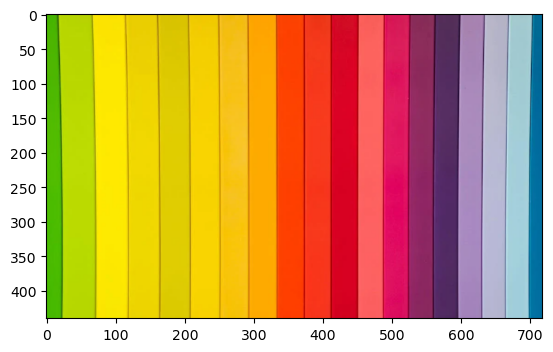

In [2]:
testImage = img.imread('colorful.png') 
plt.imshow(testImage)

In [3]:
 
cols = ["COLOR NAME", 'RED', 'GREEN', 'BLUE']
df = pd.read_csv('sw-colors.csv', usecols=cols)
df.head(20)

,COLOR NAME,RED,GREEN,BLUE
0,Mulberry Silk,148,118,108
1,Chelsea Mauve,190,172,159
2,Cabbage Rose,197,159,145
3,Rose Brocade,153,108,110
4,Deepest Mauve,109,89,90
5,Toile Red,139,83,78
6,Decorous Amber,172,117,89
7,Cajun Red,141,66,47
8,Eastlake Gold,194,142,97
9,Wickerwork,193,158,128


In [4]:
test = df.sort_values(by=["BLUE"])


In [5]:
test.head(50)
# we can see that there are missing b values, so cannot be a direct translation

,COLOR NAME,RED,GREEN,BLUE
967,Confident Yellow,254,203,1
970,Citronella,203,169,1
963,Forsythia,255,200,1
962,Goldfinch,253,183,2
972,Center Stage,178,194,22
803,Auric,196,137,25
961,Gusto Gold,248,172,29
817,Offbeat Green,156,139,31
123,Polished Mahogany,67,39,34
960,Cheerful,255,199,35


Quickly looking over the CSV file, I see no NAN, so I will not need to clean


In [6]:
# turning to numpy array, easier to work with and do calculations
rgb = df[["RED", "GREEN", "BLUE"]].to_numpy()

### Using openCV

In [7]:
# pip install opencv

In [8]:
import cv2 as cv
# Official tutorials: https://docs.opencv.org/3.4/d7/d16/tutorial_py_table_of_contents_core.html
images = ['surfin.jpg', 'wall.png', 'colorful.png']
img = cv.imread(images[1])
occurred = False
def dist(x1, y1, z1, i): #x1,y1,z1 are our
    max_diff = 255  # Normalization - scales the diff to between [0,1]
    return np.sqrt(((rgb[i][0] - x1)/max_diff)**2 + ((rgb[i][1] - y1)/max_diff)**2 + ((rgb[i][2] - z1)/max_diff)**2)

def click(event, x, y, flags, param):
    global occurred, r, g, b # make sure our variables are global because we used occurred to activate the translation
    if event == cv.EVENT_LBUTTONDBLCLK: # double click event
        b, g, r = img[y, x]  # OpenCV specifically returns as BGR
        occurred = True # used to let while loop know to run

def name(r,g,b):
    minimum = 1000 # essentially like setting min to INF
    for i in range(len(rgb)): # check every entry
        d = dist(r,g,b, i) # run the distance function
        if(d<=minimum):
            minimum = d
            cname = df.loc[i,"COLOR NAME"]#pandas function locates color name
        if minimum == 0:
            return cname
    return cname

        

cv.namedWindow('image')
cv.setMouseCallback('image', click) 

while(1):
    cv.imshow("image", img)
    if occurred:
        cv.rectangle(img,(20,20), (750,60), (0,0,0), -1)
        text = name(r,g,b) + ' R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)
        cv.putText(img, text, (50, 50), cv.FONT_HERSHEY_COMPLEX, 0.8, (255, 255, 255), 2, cv.LINE_AA)
        occurred = False

    if cv.waitKey(20) & 0xFF == 27:
        break

cv.destroyAllWindows()